## Analyze A/B Test Results



## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  

For this project, I will be working to understand the results of an A/B test run by an e-commerce website.  My goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`. 

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
print(df.shape)
print("Number of rows in the dataset: {}".format(df.shape[0]))

(294478, 5)
Number of rows in the dataset: 294478


c. The number of unique users in the dataset.

In [4]:
print("Number of unique users in the dataset: {}".format(df['user_id'].nunique()))

Number of unique users in the dataset: 290584


d. The proportion of users converted.

In [5]:
print("Number of users converted: {}".format(df.query("converted == 1").user_id.nunique()))
print("Number of users: {}".format(df.user_id.nunique()))
print("Proportion of users converted: {}".format(df.query("converted == 1").user_id.nunique() / df.user_id.nunique()))

Number of users converted: 35173
Number of users: 290584
Proportion of users converted: 0.12104245244060237


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
not_aligned = df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page")').user_id.nunique()
print("Number of times the new_page and treatment don't line up: {}".format(not_aligned))
df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page")').nunique()

Number of times the new_page and treatment don't line up: 3893


user_id         3893
timestamp       3893
group              2
landing_page       2
converted          2
dtype: int64

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

No rows have missing values.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  

a. Create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# Remove rows where treatment is not aligned with new_page or control is not aligned with old_page
df2 = df.query('(group == "treatment" and landing_page == "new_page") or (group == "control" and landing_page == "old_page")')
print(df2.shape)

(290585, 5)


In [10]:
# Double Check all of the correct rows were removed - this should be 0
print(df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0])
print(df2[((df2['group'] == 'control') == (df2['landing_page'] == 'old_page')) == False].shape[0])

0
0


`3.` Use **df2** and the cells below to answer questions.

a. How many unique **user_id**s are in **df2**?

In [11]:
print("Unique user_ids in df2: {}".format(df2['user_id'].nunique()))

Unique user_ids in df2: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
print("user_id repeated in df2: {}".format(df2[df2.duplicated(['user_id'], keep=False)]['user_id'].unique()))

user_id repeated in df2: [773192]


c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep dataframe as **df2**.

In [14]:
# dropping duplicate in dataset
df2.drop_duplicates(inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


`4.` Use **df2** in the below cells to answer the questions

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
print(df2.query("converted == 1").user_id.nunique() / df2.user_id.nunique())

0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
print(df2.query("converted == 1 and group == 'control'").user_id.nunique() / df2.query("group == 'control'").user_id.nunique())

0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
print(df2.query("converted == 1 and group == 'treatment'").user_id.nunique() / df2.query("group == 'treatment'").user_id.nunique())

0.11880806551510564


d. What is the probability that an individual received the new page?

In [18]:
print(df2.query("landing_page == 'new_page'").user_id.nunique() / df2.user_id.nunique())

0.5000619442226688


e. Is there evidence that one page leads to more conversions?

**I. Joint probability of converted and new page is:**

P(converted, new_page) = P(converted|new_page) X P(new_page)

Hence, P(converted, new_page) = 0.11880806551510564 * 0.5000619442226688

Hence, P(converted, new_page) = 0.0594



**II. From above, we can also say that:**

P(converted, old_page) = P(converted) - P(converted, new_page)

Hence, P(converted, old_page) = 0.11959708724499628 - 0.0594

Hence, P(converted, old_page) = 0.0602



**III. Now we calculate that if a conversion happens, what is the probability that it came from new page vs old page:**

P(new_page|converted) = P(converted, new_page) / P(converted)

Hence, P(new_page|converted) = 0.0594 / 0.11959708724499628 = 0.4967

P(old_page|converted) = P(converted, old_page) / P(converted)

Hence, P(old_page|converted) = 0.0602 / 0.11959708724499628 = 0.5034

**Therefore, we can see that probability of an old page given conversion is higher than probability of a new page given conversion. Hence, there is evidence that old page leads to more conversions. We have to check if this is statistically significant.**

<a id='ab_test'></a>
### Part II - A/B Test




`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer:** In this case, I want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%. Below is how I write the null and alternative hypothesis:

$$H_0: p_{new} - p_{old} \leq 0$$


$$H_1: p_{new} - p_{old} > 0$$


$p_{old}$ and $p_{new}$ are the converted rates for the old and new pages, respectivley.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem. <br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
p_new_null = df2.query("converted == 1").user_id.nunique() / df2.user_id.nunique()
print("p_new under null: {}".format(p_new_null))

p_new under null: 0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
p_old_null = df2.query("converted == 1").user_id.nunique() / df2.user_id.nunique()
print("p_old under null: {}".format(p_old_null))

p_old under null: 0.11959708724499628


c. What is $n_{new}$?

In [21]:
n_new = df2.query("group == 'treatment'").user_id.nunique()
print("n_new: {}".format(n_new))

n_new: 145310


d. What is $n_{old}$?

In [22]:
n_old = df2.query("group == 'control'").user_id.nunique()
print("n_old: {}".format(n_old))

n_old: 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = np.random.choice([0, 1], size=(n_new,), p=[1 - p_new_null, p_new_null])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = np.random.choice([0, 1], size=(n_old,), p=[1 - p_old_null, p_old_null])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
p_new = np.mean(new_page_converted)
print(p_new)
p_old = np.mean(old_page_converted)
print(p_old)
print("p_new - p_old: {}".format(p_new - p_old))

0.118243754731
0.119353772871
p_new - p_old: -0.001110018139311414


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [45]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0, 1], size=(n_new,), p=[1 - p_new_null, p_new_null])
    old_page_converted = np.random.choice([0, 1], size=(n_old,), p=[1 - p_old_null, p_old_null])
    p_new = np.mean(new_page_converted)
    p_old = np.mean(old_page_converted)
    p_diffs.append(p_new - p_old)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

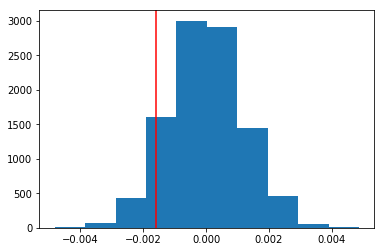

In [46]:
plt.hist(p_diffs)
p_new_observed = df2.query("converted == 1 and group == 'treatment'").user_id.nunique() / df2.query("group == 'treatment'").user_id.nunique()
p_old_observed = df2.query("converted == 1 and group == 'control'").user_id.nunique() / df2.query("group == 'control'").user_id.nunique()
obs_diff = p_new_observed - p_old_observed
plt.axvline(x=obs_diff, color = 'red');

Yes, the plot looks like what I expected. It looks like simulation of the distribution under null hypothesis. It looks like a normal distribution centred at 0 with same standard deviation as the sampling distribution. The red vertical line is where the observed statistic falls.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [47]:
print("Actual observed difference: {}". format(obs_diff))
print("Proportion of p_diffs greater than the actual difference observed in ab_data.csv: {}".format(np.mean(np.array(p_diffs) > obs_diff)))

Actual observed difference: -0.0015782389853555567
Proportion of p_diffs greater than the actual difference observed in ab_data.csv: 0.912


k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:** I computed the probability that the p_diff can be greater than actual observed difference under null hypothesis. If this value is > 5%, we cannot reject the null hypothesis. This value is called p-value in scientific studies. The p-value of 0.9 means that we cannot reject the null hypothesis. Hence, we cannot reject the null hypothesis that old page conversion rate is greater than or same as new page conversion rate.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer to the number of rows associated with the old page and new pages, respectively.

In [29]:
import statsmodels.api as sm

convert_old = df2.query("converted == 1 and group == 'control'").user_id.nunique()
convert_new = df2.query("converted == 1 and group == 'treatment'").user_id.nunique()
n_old = df2.query("group == 'control'").user_id.nunique()
n_new = df2.query("group == 'treatment'").user_id.nunique()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [30]:
# Using one-tail test to match with earlier analysis
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')
print(z_score)
print(p_value)

1.31092419842
0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer:** For one-tail test, z-score above 1.65 or below -1.65 will be significant. Since z-score of 1.31 does not exceed 1.65 we do not reject null hypothesis.
p-value is the probability that the the p_diff can be greater than actual observed difference under null hypothesis. If this value is > 5%, we cannot reject the null hypothesis.
The p_value of 0.9051 means that we cannot reject the null hypothesis.


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:** I should perform Logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
# Create intercept column
df2['intercept'] = 1

# Create dummy variable ab_page column
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])
df2['ab_page'] = df2['treatment']
df2 = df2.drop('control', axis = 1)
df2 = df2.drop('treatment', axis = 1)
df2.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [32]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Sat, 11 Aug 2018   Pseudo R-squ.:               8.085e-06
Time:                        01:05:46   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

From this model, if new page is used, probability of conversion increases by 0.9851 (exponential of -0.015) i.e. probability of conversion decreases. But result is not statistically significant as p-value > 0.05.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  

**Answer:** p-value associated with ab_page is 0.19. It differs from p_value associated with Part II as for regression model, p-value tests the null hypothesis that the coefficient for variable ab_page is equal to zero (no effect) i.e. these are the null hypothesis and alternative hypothesis: 

$$H_0: p_{new} - p_{old} == 0$$


$$H_1: p_{new} - p_{old} \neq 0$$


$p_{old}$ and $p_{new}$ are the converted rates for the old and new pages, respectivley. This basically means that the null hypothesis is that new page and old page have same conversion rate while alternative hypothesis is that old page conversion rate and new page conversion rate are statistically different.

**Hence, I think we should run the A/B test longer as based on p-value: We cannot say if old_page has higher conversion rate or new_page has higher conversion rate.**


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:**

**Advantages:**

In statistics, omitted-variable bias (OVB) occurs when a statistical model incorrectly leaves out one or more relevant variables. The bias results in the model attributing the effect of the missing variables to the estimated effects of the included variables.

Hence, 
1. Adding an orthogonal variable to a linear regression model will cause a bias reduction in the coefficients estimates and will result in a better model.

2. Adding a variable (not orthogonal to the previous ones) to a linear regression model will cause a bias reduction in the coefficients estimates but an increase in their variances. Since it is not known what are the real relevant variables, balancing this bias-variance trade-off is required.






**Disadvantages:**

1. Adding an irrelevant variable can increase the variance of the estimate of other correlation coefficient and will not have any benefits. This is a disadvantage.

** Works Cited:**

https://stats.stackexchange.com/questions/304707/costs-and-benefits-of-adding-more-variables-to-multiple-regression

https://en.wikipedia.org/wiki/Omitted-variable_bias

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion? Provide the statistical output as well as a written response to answer this question.

In [34]:
# Reading countries.csv
df_countries = pd.read_csv('countries.csv')
df_countries.head()
df_countries.info()
df2.info()
df_countries['country'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 2 columns):
user_id    290584 non-null int64
country    290584 non-null object
dtypes: int64(1), object(1)
memory usage: 4.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 7 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
intercept       290585 non-null int64
ab_page         290585 non-null uint8
dtypes: int64(3), object(3), uint8(1)
memory usage: 15.8+ MB


array(['UK', 'US', 'CA'], dtype=object)

In [35]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [36]:
df_countries.user_id.nunique()

290584

In [37]:
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [38]:
# Join df_countries and df2
df2_join_country = df2.join(df_countries.set_index('user_id'), on='user_id')

# Checking for one User Id
df2_join_country.query("user_id == 834778")

print("New data frame info")
df2_join_country.info()

print("Check for missing values")
df2_join_country.isnull().sum()

New data frame info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 8 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
intercept       290585 non-null int64
ab_page         290585 non-null uint8
country         290585 non-null object
dtypes: int64(3), object(4), uint8(1)
memory usage: 18.0+ MB
Check for missing values


user_id         0
timestamp       0
group           0
landing_page    0
converted       0
intercept       0
ab_page         0
country         0
dtype: int64

In [39]:
df2_join_country.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [40]:
# Create dummy variables for UK, US. Use CA as baseline (i.e. drop CA)
df2_join_country[['CA', 'UK', 'US']] = pd.get_dummies(df2_join_country['country'])
df2_join_country = df2_join_country.drop('CA', axis = 1)

# Create and fit the model
logit_mod = sm.Logit(df2_join_country['converted'], df2_join_country[['intercept', 'ab_page', 'US', 'UK']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Sat, 11 Aug 2018   Pseudo R-squ.:               2.324e-05
Time:                        01:11:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1758
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0150      0.011     -1.308      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

US dummy variable p-value is 0.13. UK dummy variable p-value is 0.074. Both variables have p-value > 0.05. If p value is > 5%, we cannot reject the null hypothesis (Country US/UK has no impact on conversion in comparison to CA). Hence, we cannot reject this hypothesis for both US and UK: "Country has no impact on conversion in comparison to CA".     
Hence, we cannot reject this: "Country has no impact on conversion."
Although not statistically significant, we can see that based on country, 

1. probability of conversion increases for USA by 1.0492 (exponential of 0.048) in comparison to CA holding other variables constant
2. probability of conversion increases for UK by 1.0519 (exponential of 0.0506) in comparison to CA holding other variables constant

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there are significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [42]:
# Creating additional columns to test interaction between country and page
df2_join_country['ab_page_US'] = df2_join_country['ab_page'] * df2_join_country['US']
df2_join_country['ab_page_UK'] = df2_join_country['ab_page'] * df2_join_country['UK']
logit_mod = sm.Logit(df2_join_country['converted'], df2_join_country[['intercept', 'ab_page', 'US', 'UK', 'ab_page_US', 'ab_page_UK']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


In [43]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            5
Date:                Sat, 11 Aug 2018   Pseudo R-squ.:               3.483e-05
Time:                        01:12:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1918
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
ab_page_US     0.0469      0.054      0.872      0.383      -0.059       0.152
ab_page_UK     0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

No interaction coefficients are statistically significant as p-value > 0.05 for all coefficients. Although not statistically significant, we can see that based on the country, relationship between ab_page and conversion rate changes.
1. Given country is USA, new_page leads to changing the probability of conversion by exp(-0.0674+0.0469) = 0.9797. Hence, if country is USA, new_page leads to changing the probability of conversion by 0.9797.
2. If country is UK, new_page leads to changing the probability of conversion by exp(-0.0674+0.0783) = 1.0110. Hence, if country is UK, new_page leads to changing the probability of conversion by 1.0110.
3. If country is CA, new_page leads to changing the probability of conversion by exp(-0.0674) = 0.9348. Hence, if country is UK, new_page leads to changing the probability of conversion by 0.9348.

** Therefore, although not statistically significant, UK is a country where new_page leads to higher conversion than old_page. Without using interaction between country and ab_page, we could not see this. But results are not statistically significant.**

In [48]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0